# Predicting hospital admission at emergency department triage

**Main statement**
Using machine learning, how might we predict the patient admission into the hospital in the emergency department to provide better information that helps the different stakeholders make better decisions.


### Notebook Content

- Baseline Models
    - Logistic Regression
- Class imabalance
    - Downsampling
    - Imbalance learn
- Feature selection
    - Variance Threshold
    - K-best
    - PCA
- Hiperparameter Optimization
    - Optimizing for C value
    - Optimizing for max-depth
    - Optimizing for K in KNN (drop this one? It is computationally tooo expensive)
- Cross validation
    - C value
    - Max_depth
    - N- estimators in Random forest
    - N- estimators in AdaBoost Classifier
- Pipeline


**TO DO:** 

IN VT AND K BEST I SCALED BEFORE SPLITTING, FIX THAT.

BE ABLE TO EXPLAIN YOUR THINKING PROCESS IS QUITE IMPORTANT, BUT I THINK I DO NOT HAVE CLEAR THE MODELING PROCESS:

- ARE THE STEPS THAT I AM FOLLOWING IN THIS PROJECT CORRECT?
- HOW IS THE USUAL PROCESS IN INDUSTRY OR IT IS SOMETHING THAT GROUPS DEFINE OR SPECIFIC PROJECTS CHANGE EACH TIME?
- SHOULD I TRY OTHER MODEL? XGboost

**PIPELINE**

1. Downsampling

2. Variance Threshold 

3. Modeling with and without PCA

- Logistic Regresion with best C value
- Decision Tree with best Max_depth
- Random Forest with best estimator
- Adaboost Cl with best estimators

4. Choose the best, deploy and EVALUATE (scores, AUC)

This Notebook is the continuation of one before that contains all the process of Data exploration and preprocessing. 
The dataframes that will be is the 'processed_df'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from scipy import stats

In [2]:
# Load the data
df_processed_original = pd.read_csv('/Users/ccalderon/Documents/Repositories/df_processed.csv')


In [3]:
# Shape
print(f'The dataframe has {df_processed_original.shape[0]} rows and {df_processed_original.shape[1]} columns.')


The dataframe has 534730 rows and 602 columns.


**Take only 10% of the data to make faster run the models, once the notebook will be completed run everything in SageMaker using the whole dataframe**
Remember change the name of the original df_processed when will be the moment to run the notebook with thw whole quantity of data.

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into sample and remainder sets, with stratification based on the class labels
df_processed, remainder_df = train_test_split(df_processed_original, test_size=0.9, stratify=df_processed_original['disposition'], random_state=1)



In [5]:
df_processed.shape

(53473, 602)

# Modeling

Describe the following process:::::


Remember make the prior assumptions

In [6]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53473 entries, 399260 to 378058
Columns: 602 entries, disposition to whtblooddx
dtypes: float64(202), int64(400)
memory usage: 246.0 MB


In [7]:
# Define the predictor variables
X = df_processed.drop(columns=['disposition'],axis=1).copy()

# Define the target variable
y = df_processed['disposition']

In [8]:
from sklearn.model_selection import train_test_split

# Create the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                 test_size=0.3, 
                                                 random_state=3, 
                                                 stratify=y)

## Logistic Regression Model

Pending Write the previous assumptions:

In [9]:
# Logistic regression baseline model
from sklearn.linear_model import LogisticRegression

baseline_logreg = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=1)
baseline_logreg.fit(X_train, y_train)
predictions_train = baseline_logreg.predict(X_train)
predictions_test = baseline_logreg.predict(X_test)
blg_train_accuracy = baseline_logreg.score(X_train, y_train)
blr_test_accuracy = baseline_logreg.score(X_test, y_test)

# Print the accuracy of the model
print(f"Baseline_logred train accuracy: {blg_train_accuracy}")
print(f"Baseline_logreg test accuracy: {blr_test_accuracy}")

Baseline_logred train accuracy: 0.8599022200849563
Baseline_logreg test accuracy: 0.8488966463034534


In [10]:
# Logistic Regression Coeficients 
baseline_logreg.coef_

array([[-9.70219646e-02, -6.92167348e-02, -5.35765152e-01,
        -4.71446109e-01, -2.30557742e-01,  7.62178022e-02,
        -1.34294448e-03, -2.65593678e-02, -1.93509946e-02,
        -6.46656110e-02,  1.64637542e-01,  4.09842484e-01,
         1.85312694e-01,  3.08756356e-01, -3.52448432e-01,
        -2.96510532e-01,  6.32699329e-02, -1.63066304e-01,
        -1.89708294e-02, -4.01402437e-02,  2.14632756e-03,
        -1.38001464e-01, -1.03979626e-01, -6.29899571e-02,
        -4.73768779e-02, -8.90236102e-02, -1.18237627e-01,
         4.24783748e-02,  3.51579855e-02, -6.29392541e-02,
        -2.41519445e-02, -7.50566812e-02, -1.02482538e-01,
        -1.46512469e-01, -1.63597671e-01, -1.27263293e-01,
        -1.59021329e-01, -1.97014748e-01, -1.12960036e-01,
         3.95789723e-02, -6.68229833e-02, -2.05763728e-01,
         4.04929879e-01, -3.31228969e-02,  2.45610599e-01,
         2.50154796e+00,  9.14234455e-01,  9.69188627e-02,
        -2.04941234e+00, -2.16529278e+00,  1.79328571e-0

In [11]:
# Define the feature_label and its coefficient
column_labels = X_train.columns.tolist()

# Squeeze function to convert the numpy array into a 1-dimensional array
coef = baseline_logreg.coef_.squeeze().tolist()

In [12]:
# Create a dictionary with column_labels as key and coeficients as values

lg_predictors= dict(zip(column_labels, coef))
lg_predictors

{'dep_A': -0.09702196462705877,
 'dep_B': -0.06921673476596821,
 'dep_C': -0.5357651515540295,
 'Female': -0.47144610924345054,
 'Male': -0.23055774170249868,
 'Divorced': 0.07621780218489932,
 'Married': -0.0013429444762703148,
 'Single': -0.026559367773441412,
 'Widowed': -0.01935099463122749,
 'Full Time': -0.06466561101754087,
 'Not Employed': 0.16463754237348863,
 'Commercial': 0.40984248360103015,
 'Medicaid': 0.1853126936417625,
 'Medicare': 0.30875635647591604,
 'Car': -0.3524484322688748,
 'Walk-in': -0.29651053153345275,
 'ambulance': 0.06326993292158946,
 'April': -0.1630663042908083,
 'August': -0.018970829360427106,
 'December': -0.040140243746182705,
 'February': 0.0021463275576474286,
 'January': -0.13800146350391498,
 'July': -0.10397962616270637,
 'June': -0.06298995711550127,
 'March': -0.04737687786072833,
 'May': -0.08902361017367792,
 'November': -0.11823762655598906,
 'October': 0.04247837476575221,
 'September': 0.035157985501422066,
 'Friday': -0.062939254118939

In [13]:
# Top most predictive features by coeficient

sorted_predictors = sorted(lg_predictors.items(), key=lambda x: x[1], reverse=True)
sorted_predictors

[('esi_1', 2.5015479570387558),
 ('cc_respiratorydistress', 2.120106595338743),
 ('cc_strokealert', 1.7590132637562228),
 ('cc_feverimmunocompromised', 1.6717565166696045),
 ('cc_psychoticsymptoms', 1.5651823362114734),
 ('cc_cellulitis', 1.5223396234124298),
 ('cc_fever-75yearsorolder', 1.4687432323025962),
 ('cc_extremityweakness', 1.3511830202982338),
 ('cc_fulltrauma', 1.2288736124728168),
 ('meds_contraceptives', 1.2007503038402996),
 ('meds_biologicals', 1.1770320591898082),
 ('acutphanm', 1.171997032406671),
 ('cc_neurologicproblem', 1.1379631730781556),
 ('cc_follow-upcellulitis', 1.0858908817427098),
 ('cc_fever-9weeksto74years', 1.0397121718028273),
 ('cc_abdominaldistention', 1.0171489531928646),
 ('cc_woundinfection', 1.008627503610258),
 ('cc_pain', 0.9785301439769255),
 ('cc_multiplefalls', 0.944382800131184),
 ('nervcongan', 0.919203045407405),
 ('cc_alteredmentalstatus', 0.9161481966948598),
 ('esi_2', 0.9142344553010794),
 ('cc_chills', 0.911422742653066),
 ('cc_dehydr

It looks like the model is perfoming really well, 85% accuracy. However, imbalanced data forces us to rely on other evaluation metrics than accuracy: precision, recall, F1 score, and area under the ROC curve to evaluate our model.

Class imbalance can cause an issue when training our models. Consider the cost function when the model is fitting on the training data. The cost function is going to be biased towards the majority class and will result in a model that doesn't learn enough about the minority class.

In [14]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, predictions_test)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Discharge", "Predicted Admitted"],
    index=["True Discharge", "True Admitted"]
)

display(cf_df)

,Predicted Discharge,Predicted Admitted
True Discharge,10370,730
True Admitted,1694,3248


- True Discharge: 104,335 patients were actually discharged and the model correctly predicted that they would be discharged.
- False Admitted: 6,667 patients were actually discharged but the model incorrectly predicted that they would be admitted.
- False Discharge: 16,558 patients were actually admitted but the model incorrectly predicted that they would be discharged.
- True Admitted: 32,859 patients were actually admitted and the model correctly predicted that they would be admitted.

In summary, the model correctly classified 137,194 patients (104,335 true discharge and 32,859 true admitted) and incorrectly classified 23,225 patients (6,667 false admitted and 16,558 false discharge).

In [15]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions_test)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.93      0.90     11100
           1       0.82      0.66      0.73      4942

    accuracy                           0.85     16042
   macro avg       0.84      0.80      0.81     16042
weighted avg       0.85      0.85      0.84     16042



Precision: the precision for class 0.0 is 0.86, which means that 86% of the instances that the model predicted as 0.0 were actually 0.0. Similarly, the precision for class 1.0 is 0.83, indicating that 83% of the instances that the model predicted as 1.0 were actually 1.0.

Recall: the recall for class 0.0 is 0.94, which means that 94% of the actual instances that were 0.0 were correctly predicted by the model. **The recall for class 1.0 is 0.66, indicating that 66% of the actual instances that were 1.0 were correctly predicted by the model**.

F1-score: F1-score for class 0.0 is 0.90, and the F1-score for class 1.0 is 0.74. The weighted average F1-score is 0.85, indicating that the model performed reasonably well overall.

To correct the imbalance in this case the approache is going to be downsampling. (A very important note here is that which ever approach we apply should only be done to the training data! The test data should remain untouched and have class imbalance consistent with what you would expect the real world to be.)

## Class imbalance

### Downsampling

Explain this step:::::

In [16]:
from sklearn.utils import resample

print('Number of class 0 examples before:', X_train[y_train == 0].shape[0])

X_downsampled, y_downsampled = resample(X_train[y_train == 0], 
                                        y_train[y_train == 0], 
                                        replace=True, 
                                        n_samples=X_train[y_train == 1].shape[0], 
                                        random_state=123)

print('Number of class 0 examples after:', X_downsampled.shape[0])

# Combine downsample with original data
X_train_bal2 = np.vstack((X_train[y_train == 1], X_downsampled))
y_train_bal2 = np.hstack((y_train[y_train == 1], y_downsampled))

# Convert the X variable numpy array into a dataframe
X_train_bal2 = pd.DataFrame(X_train_bal2, columns=X.columns)

Number of class 0 examples before: 25901
Number of class 0 examples after: 11530


Let's try again the logistic regression model:

In [17]:
# Logistic regression after downsampling

resample_logreg = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=1)
resample_logreg.fit(X_train_bal2, y_train_bal2)
predictions_train = resample_logreg.predict(X_train_bal2)
predictions_test_ds = resample_logreg.predict(X_test)
resample_train_accuracy = resample_logreg.score(X_train_bal2, y_train_bal2)
test_accuracy = resample_logreg.score(X_test, y_test)

# Print the accuracy of the model
print(f"Baseline_logred train accuracy: {resample_train_accuracy}")
print(f"Baseline_logreg test accuracy: {test_accuracy}")

Baseline_logred train accuracy: 0.8346053772766695
Baseline_logreg test accuracy: 0.8300710634584216


In [18]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, predictions_test_ds)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Discharge", "Predicted Admitted"],
    index=["True Discharge", "True Admitted"]
)

display(cf_df)

,Predicted Discharge,Predicted Admitted
True Discharge,9383,1717
True Admitted,1009,3933


In [19]:
# Logistic Regression Report with downsampling
report_ds = classification_report(y_test, predictions_test_ds)
print(report_ds)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87     11100
           1       0.70      0.80      0.74      4942

    accuracy                           0.83     16042
   macro avg       0.80      0.82      0.81     16042
weighted avg       0.84      0.83      0.83     16042



Remember Logistic Regression Report without downsampling

In [20]:
# Logistic Regression Report without downsampling
report = classification_report(y_test, predictions_test)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.93      0.90     11100
           1       0.82      0.66      0.73      4942

    accuracy                           0.85     16042
   macro avg       0.84      0.80      0.81     16042
weighted avg       0.85      0.85      0.84     16042



Now the model is generating more false positives (Type I error) and less false negatives (Type II error), the recall improved but the precision went down. Gladly the overal performance is quite similar ~84%.

### Imbalaced-learn 

Imbalanced-learn (imported as imblearn) is an open source, MIT-licensed library relying on scikit-learn (imported as sklearn) and provides tools when dealing with classification with imbalanced classes.Imbalanced-learn (imported as imblearn) is an open source, MIT-licensed library relying on scikit-learn (imported as sklearn) and provides tools when dealing with classification with imbalanced classes.

In [21]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print(sorted(Counter(y_resampled).items()))

[(0, 11530), (1, 11530)]


In [22]:
# Logistic regression after downsampling with imbalance learn

resample2_logreg = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=1)
resample2_logreg.fit(X_resampled, y_resampled)
predictions_train = resample2_logreg.predict(X_resampled)
predictions_test_imb = resample2_logreg.predict(X_test)
resample2_train_accuracy = resample2_logreg.score(X_resampled, y_resampled)
test_accuracy = resample_logreg.score(X_test, y_test)

# Print the accuracy of the model
print(f"Baseline_logred train accuracy: {resample2_train_accuracy}")
print(f"Baseline_logreg test accuracy: {test_accuracy}")

Baseline_logred train accuracy: 0.8363399826539463
Baseline_logreg test accuracy: 0.8300710634584216


In [23]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, predictions_test_imb)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Discharge", "Predicted Admitted"],
    index=["True Discharge", "True Admitted"]
)

display(cf_df)

,Predicted Discharge,Predicted Admitted
True Discharge,9379,1721
True Admitted,982,3960


In [24]:
# Logistic Regression Report after downsampling with imbalance learn

report_imb = classification_report(y_test, predictions_test_imb)
print(report_imb)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     11100
           1       0.70      0.80      0.75      4942

    accuracy                           0.83     16042
   macro avg       0.80      0.82      0.81     16042
weighted avg       0.84      0.83      0.83     16042



Compare with downsampling results

In [25]:
# Logistic Regression Report with downsampling
report_ds = classification_report(y_test, predictions_test_ds)
print(report_ds)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87     11100
           1       0.70      0.80      0.74      4942

    accuracy                           0.83     16042
   macro avg       0.80      0.82      0.81     16042
weighted avg       0.84      0.83      0.83     16042



After Downsampling and RandomUnderSampler the model is performing quite similar.

## Feature selection

Feature Selection: the most simple model possible with the most predictive power.

### Variance threshold

In [26]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler

my_mm = MinMaxScaler()
df_scaled = my_mm.fit_transform(df_processed)

df_scaled = pd.DataFrame(data=df_scaled, columns=df_processed.columns)

In [27]:
from sklearn.feature_selection import VarianceThreshold
#Loop different variance thresholds

thresholds = [0.00004, 0.0004, 0.004, 0.04]

blg_train_accuracies_th = []
blr_test_accuracies_th = []

for th in thresholds:

    # Instantiate the VarianceThresholder, we need to set a threshold variance
    my_vt = VarianceThreshold(threshold=th)

    # Fit to the data and calculate the variances per column
    my_vt.fit(df_scaled)
    
    # Apply the variance threshold to drop columns below the given variance
    df_scaled_th = pd.DataFrame(my_vt.transform(df_scaled), columns = df_scaled.columns[my_vt.get_support()])

    # Define the predictor variables
    X_th = df_scaled_th.drop(columns=['disposition'],axis=1).copy()

    # Define the target variable
    y_th = df_scaled_th['disposition']

    # Create the train and test sets
    X_train_th, X_test_th, y_train_th, y_test_th = train_test_split(X_th, y_th, 
                                                     test_size=0.3, 
                                                     random_state=3, 
                                                     stratify=y)

    # Logistic regression baseline model
    
    baseline_logreg = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=1)
    baseline_logreg.fit(X_train_th, y_train_th)
    predictions_train = baseline_logreg.predict(X_train_th)
    predictions_test = baseline_logreg.predict(X_test_th)
    blg_train_accuracy_th = baseline_logreg.score(X_train_th, y_train_th)
    blr_test_accuracy_th = baseline_logreg.score(X_test_th, y_test_th)

    # Print the accuracy of the model
    blg_train_accuracies_th.append(blg_train_accuracy_th)
    blr_test_accuracies_th.append(blr_test_accuracy_th)



In [28]:
blg_train_accuracies_th

[0.8588870187812241, 0.8585931447196175, 0.8515134514172744, 0.786380273035719]

In [29]:
blr_test_accuracies_th

[0.8486473008353074,
 0.8486473008353074,
 0.8443460915097868,
 0.7823214063084404]

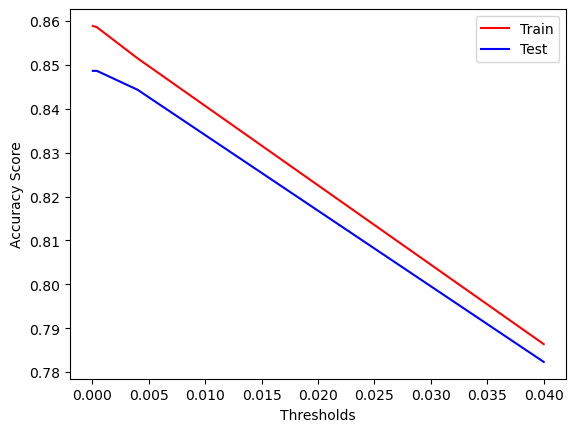

In [30]:
plt.plot(thresholds, blg_train_accuracies_th, label='Train', color='red')
plt.plot(thresholds, blr_test_accuracies_th, label='Test', color = 'blue')
plt.legend()
plt.xlabel('Thresholds')
plt.ylabel('Accuracy Score')

plt.show()

It looks like 0.004 is a good threshold:

In [31]:
# Instantiate the VarianceThresholder, we need to set a threshold variance
my_vt = VarianceThreshold(threshold=0.004)

# Fit to the data and calculate the variances per column
my_vt.fit(df_scaled)

VarianceThreshold(threshold=0.004)

In [32]:
my_vt.variances_

array([2.13152630e-01, 2.46488939e-01, 2.13788842e-01, 1.13867112e-01,
       2.47687382e-01, 2.47687382e-01, 9.19494051e-02, 2.05898665e-01,
       2.49471326e-01, 8.47315146e-02, 1.75987064e-01, 2.04744446e-01,
       2.19995435e-01, 2.31293978e-01, 1.76515237e-01, 2.41886765e-01,
       1.66405449e-01, 2.29839537e-01, 8.96212674e-02, 7.10010482e-02,
       6.96693510e-02, 6.45026826e-02, 7.06369075e-02, 7.02565401e-02,
       9.15476763e-02, 8.99655883e-02, 9.38469587e-02, 6.38093558e-02,
       6.92720596e-02, 7.04467742e-02, 1.23315764e-01, 1.30104802e-01,
       1.17934843e-01, 1.18545783e-01, 1.18220125e-01, 1.25687480e-01,
       1.23089352e-01, 5.48436822e-02, 1.47885373e-01, 1.91136618e-01,
       1.76758371e-01, 1.47454649e-01, 8.58093166e-02, 1.70611855e-01,
       2.48732825e-01, 2.04664844e-01, 9.86829323e-03, 2.12002236e-01,
       2.45741494e-01, 1.71463169e-01, 2.95359189e-02, 5.41876254e-02,
       1.02350887e-03, 2.62181232e-03, 1.03847331e-02, 1.12080258e-03,
      

In [33]:
# Get the columns which are retained
my_vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True, False, False,
        True,  True,  True, False, False, False,  True,  True, False,
        True, False, False,  True,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False,  True,  True, False,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True,  True,

In [34]:
# Apply the variance threshold to drop columns below the given variance
df_scaled_th = pd.DataFrame(my_vt.transform(df_scaled), columns = df_scaled.columns[my_vt.get_support()])
df_scaled_th


,disposition,dep_A,dep_B,dep_C,Female,Male,Divorced,Married,Single,Widowed,...,teethdx,thyroiddsor,tia,ulceratcol,ulcerskin,unclassified,urinstone,uti,varicosevn,viralinfect
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53469,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53470,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53471,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
df_scaled_th.shape

(53473, 291)

In [36]:
df_scaled_th.columns.values

array(['disposition', 'dep_A', 'dep_B', 'dep_C', 'Female', 'Male',
       'Divorced', 'Married', 'Single', 'Widowed', 'Full Time',
       'Not Employed', 'Commercial', 'Medicaid', 'Medicare', 'Car',
       'Walk-in', 'ambulance', 'April', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', '03-06', '07-10', '11-14', '15-18',
       '19-22', '23-02', 'pv_admit', 'pv_discharge', 'pv_none', 'esi_1',
       'esi_2', 'esi_3', 'esi_4', 'esi_5', 'age', 'n_surgeries',
       'cc_abdominalpain', 'cc_abdominalpainpregnant', 'cc_abnormallab',
       'cc_abscess', 'cc_alcoholintoxication', 'cc_alcoholproblem',
       'cc_allergicreaction', 'cc_anklepain', 'cc_anxiety', 'cc_armpain',
       'cc_asthma', 'cc_backpain', 'cc_breathingdifficulty',
       'cc_chestpain', 'cc_coldlikesymptoms', 'cc_cough', 'cc_dentalpain',
       'cc_diarrhea', 'c

Applying 0.004 Threshold the final dataframe contains only 258 columns, let's confirm how the model perform:

In [37]:
# Define the predictor variables
X_th = df_scaled_th.drop(columns=['disposition'],axis=1).copy()

# Define the target variable
y_th = df_scaled_th['disposition']

In [38]:
from sklearn.model_selection import train_test_split

# Create the train and test sets
X_train_th, X_test_th, y_train_th, y_test_th = train_test_split(X_th, y_th, 
                                                 test_size=0.3, 
                                                 random_state=3, 
                                                 stratify=y)

In [39]:
# Logistic regression baseline model
from sklearn.linear_model import LogisticRegression

baseline_logreg = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=1)
baseline_logreg.fit(X_train_th, y_train_th)
predictions_train = baseline_logreg.predict(X_train_th)
predictions_test = baseline_logreg.predict(X_test_th)
blg_train_accuracy_th = baseline_logreg.score(X_train_th, y_train_th)
blr_test_accuracy_th = baseline_logreg.score(X_test_th, y_test_th)

# Print the accuracy of the model
print(f"Baseline_logred train accuracy: {blg_train_accuracy_th}")
print(f"Baseline_logreg test accuracy: {blr_test_accuracy_th}")

Baseline_logred train accuracy: 0.8515134514172744
Baseline_logreg test accuracy: 0.8443460915097868


### K-best

- from sklearn.feature_selection import SelectKBest
- from sklearn.feature_selection import f_classif

Using the scaled dataframe:

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Define the predictor variables
X = df_scaled.drop(columns=['disposition'],axis=1).copy()

# Define the target variable
y = df_scaled['disposition']

In [41]:
from sklearn.model_selection import train_test_split

# Create the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                 test_size=0.3, 
                                                 random_state=3, 
                                                 stratify=y)

#### f_classif

In [42]:
train_acc=[]
test_acc=[]

ks = [100,200,300,400,500,600]

for k in ks:
    
    my_KBest = SelectKBest(f_classif, k=k).fit(X_train, y_train)
    
    X_train_selected = my_KBest.transform(X_train)
    X_test_selected = my_KBest.transform(X_test)
    
    
    model = LogisticRegression(max_iter=10000)
    
    model.fit(X_train_selected, y_train)
    
    model_train_acc = model.score(X_train_selected, y_train)
    model_test_acc = model.score(X_test_selected, y_test)
    
    train_acc.append(model_train_acc)
    test_acc.append(model_test_acc)


/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [258 345 393 394 401 462 486 532 567 592] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [258 345 393 394 401 462 486 532 567 592] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature

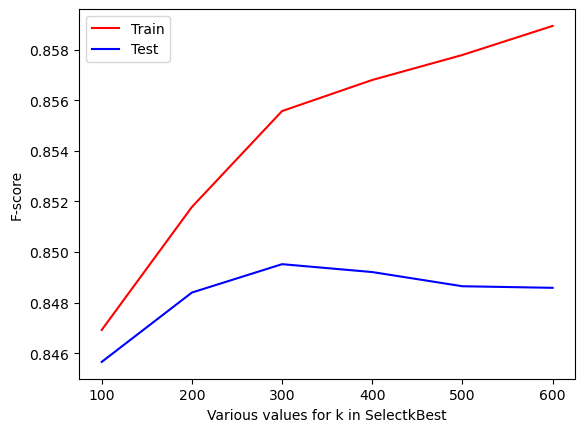

In [43]:
plt.plot(ks, train_acc, label='Train', color='red')
plt.plot(ks, test_acc, label='Test', color = 'blue')

plt.legend()
plt.xlabel('Various values for k in SelectkBest')
plt.ylabel('F-score')

plt.show()

#### mutual_info_classif

In scikit-learn, mutual_info_classif is a function that can be used for feature selection in classification tasks. It takes as input the feature matrix and target variable, and returns an array of scores, one for each feature. The score represents the estimated mutual information between the feature and the target variable, and can be used to rank the features by their importance.

Higher mutual_info_classif scores indicate that the feature is more informative for predicting the target variable, while lower scores indicate that the feature is less informative. The scores can be used to select a subset of the most important features for the task at hand, or to gain insights into the relationships between the features and the target variable.

In [44]:
from sklearn.feature_selection import mutual_info_classif

ks = [100,200,300,400,500,600]

train_acc=[]
test_acc=[]

for k in ks:
    
    my_KBest = SelectKBest(mutual_info_classif, k=k).fit(X_train, y_train)
    
    X_train_selected = my_KBest.transform(X_train)
    X_test_selected = my_KBest.transform(X_test)
    
    
    model = LogisticRegression(max_iter=10000)
    
    model.fit(X_train_selected, y_train)
    
    model_train_acc = model.score(X_train_selected, y_train)
    model_test_acc = model.score(X_test_selected, y_test)
    
    train_acc.append(model_train_acc)
    test_acc.append(model_test_acc)


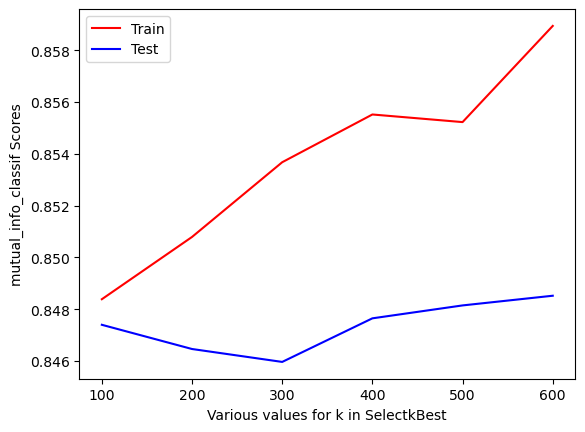

In [45]:
plt.plot(ks, train_acc, label='Train', color='red')
plt.plot(ks, test_acc, label='Test', color = 'blue')

plt.legend()
plt.xlabel('Various values for k in SelectkBest')
plt.ylabel('mutual_info_classif Scores')

plt.show()

### PCA (use vt df)


In [46]:
# Define the predictor variables
X = df_processed.drop(columns=['disposition'],axis=1).copy()

# Define the target variable
y = df_processed['disposition']

In [47]:
# Create the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                 test_size=0.3, 
                                                 random_state=3, 
                                                 stratify=y)

In [48]:
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

In [73]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Import time library to record computational times
import time

# Train again a logistic regression model but now with the data previously scaled
start_time = time.time()
logit = LogisticRegression(solver='lbfgs', random_state=1, max_iter=10000)
logit.fit(X_train_ss, y_train)
y_pred_logit = logit.predict(X_test_ss)
logit_runtime = time.time() - start_time
acc_logit = accuracy_score(y_test, y_pred_logit)

print(f"Logistic Regression without PCA: Accuracy = {acc_logit}, Runtime = {logit_runtime}")

# Train a logistic regression model on the PCA-transformed dataset with different number of components
# Define the range of n_components to try
n_components = range(10,100,10)

# Initialize empty lists to store accuracy and runtime values
accuracy_scores = []
runtimes = []
accuracy_scores_train =[]

for n in n_components:
    
    # Use PCA to reduce the dimensionality of the dataset
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_ss)
    X_test_pca = pca.fit_transform(X_test_ss)

    # Train a logistic regression model on the PCA-transformed dataset
    start_time = time.time()
    logit_pca = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=1)
    logit_pca.fit(X_train_pca, y_train)
    y_pred_pca_train = logit_pca.predict(X_train_pca)
    y_pred_pca = logit_pca.predict(X_test_pca)
    lg_pca_runtime = time.time() - start_time

    # Compute the accuracy scores of PCA-transformed logistic regression models
    acc_logit_pca_train = accuracy_score(y_test, y_pred_pca_train)
    acc_logit_pca = accuracy_score(y_test, y_pred_pca)
    
    # Append the accuracy and runtime values to the respective lists
    accuracy_scores.append(acc_logit_pca)
    accuracy_scores_train.append(acc_logit_pca_train)
    runtimes.append(lg_pca_runtime)
    
    print(f"Log. Reg. with PCA adjusted to {n} components | Accuracy = {acc_logit_pca} | Runtime = {lg_pca_runtime}")


Logistic Regression without PCA: Accuracy = 0.8507044009475128, Runtime = 1.2891099452972412


ValueError: Found input variables with inconsistent numbers of samples: [16042, 26201]

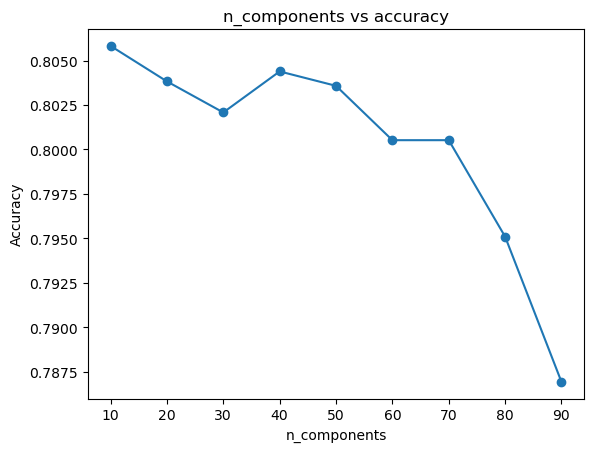

In [50]:
# Plot n_components vs accuracy

plt.plot(n_components, accuracy_scores, marker='o')
plt.title('n_components vs accuracy')
plt.xlabel('n_components')
plt.ylabel('Accuracy')
plt.show()

## Hiperparameter Optimization

In [51]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53473 entries, 399260 to 378058
Columns: 602 entries, disposition to whtblooddx
dtypes: float64(202), int64(400)
memory usage: 246.0 MB


In [52]:
# Set up X (i.e., independent variables; features) and y (i.e., dependent variable; target)

X = df_processed.drop('disposition', axis=1)
y = df_processed['disposition']

# Print shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (53473, 601)
Shape of y: (53473,)


In [53]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Print info on how the data has been split
print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 37431 data points.
The test set has 16042 data points.


In [54]:
# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.3, random_state=1, stratify=y_rem)

# Print info on how the data has been split
print(f'The train set has {len(X_train)} data points.')
print(f'The validation set has {len(X_val)} data points.')

The train set has 26201 data points.
The validation set has 11230 data points.


Check that the class proportions have been preserved in all sets

In [55]:
print('Proportions in original data:')
print(y.value_counts(normalize=True), '\n')

print('Proportions in remainder set:')
print(y_rem.value_counts(normalize=True), '\n')

print('Proportions in test set:')
print(y_test.value_counts(normalize=True), '\n')

print('Proportions in train set:')
print(y_train.value_counts(normalize=True), '\n')

print('Proportions in validation set:')
print(y_val.value_counts(normalize=True), '\n')

Proportions in original data:
0    0.691957
1    0.308043
Name: disposition, dtype: float64 

Proportions in remainder set:
0    0.691967
1    0.308033
Name: disposition, dtype: float64 

Proportions in test set:
0    0.691934
1    0.308066
Name: disposition, dtype: float64 

Proportions in train set:
0    0.691958
1    0.308042
Name: disposition, dtype: float64 

Proportions in validation set:
0    0.691986
1    0.308014
Name: disposition, dtype: float64 



#### Optimizing for C in Logistic Regression

In [56]:
# Let's try a modest range of C values
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

# Set up empty lists
train_accuracies = []
validation_accuracies = []

# Iterate over the C values
for value in c_values:
    
    # Instantiate a log reg and fit to the train set
    logreg = LogisticRegression(C=value, random_state=1, max_iter=10000).fit(X_train, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    train_accuracies.append(logreg.score(X_train, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    validation_accuracies.append(logreg.score(X_val, y_val))

In [57]:
# Check the accuracies
pd.DataFrame({'C value': c_values, 'train accuracy': train_accuracies, 'validation accuracy': validation_accuracies})

,C value,train accuracy,validation accuracy
0,0.00001,0.743483,0.746305
1,0.00010,0.793481,0.801336
2,0.00100,0.830693,0.834996
3,0.10000,0.856838,0.854230
4,1.00000,0.859547,0.853428
5,10.00000,0.860082,0.852716
6,100.00000,0.860425,0.852360
7,1000.00000,0.859967,0.852538
8,10000.00000,0.860311,0.852182


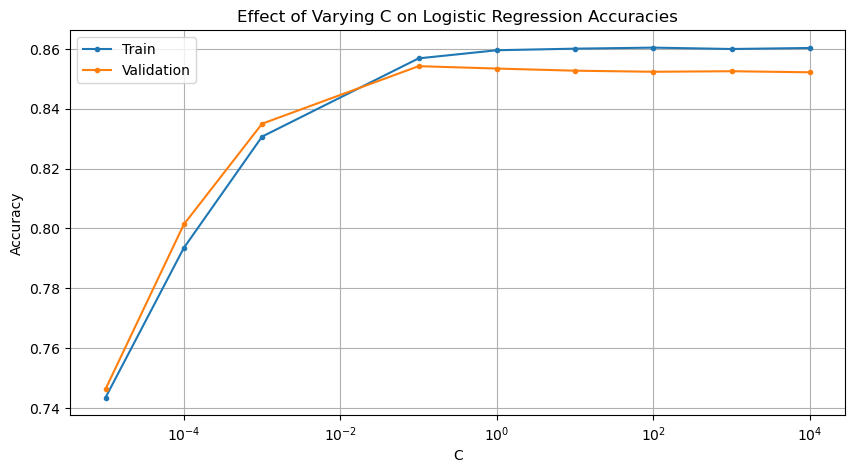

In [58]:
# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.plot(c_values, train_accuracies, label='Train', marker='.')
plt.plot(c_values, validation_accuracies, label='Validation', marker='.')
plt.legend()
plt.title('Effect of Varying C on Logistic Regression Accuracies')
plt.xscale('log') # Put the x-axis on a log scale; this is important because the C values vary in orders of magnitude
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [59]:
# Instantiate a log reg and fit to the remainder set
validated_logreg = LogisticRegression(C=1, random_state=1).fit(X_rem, y_rem)

# Print the accuracies
print(f'Accuracy on remainder set: {validated_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {validated_logreg.score(X_test, y_test)}')

Accuracy on remainder set: 0.8506585450562368
Accuracy on test set: 0.8477122553297594


/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Optimizing for max-depth in Decision Tree classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree baseline (data no scaled)

max_depth = range(1,40)

train_acc = []
validation_acc = []

for depth in max_depth:
    
    # Define the KNN model 
    dtc = DecisionTreeClassifier(max_depth = depth)
    
    # Train the KNN model on the new training subsets
    dtc.fit(X_train, y_train)
    
    # Predict 
    y_pred_train = dtc.predict(X_train)
    y_pred_val = dtc.predict(X_val)
    
    # Evaluate the model on the test set
    dtc_knn_train = accuracy_score(y_train, y_pred_train)
    dtc_knn_val = accuracy_score(y_val, y_pred_val)
    
    # Print the results
    print(f"Max_depth: {depth} | Train Accuracy: {dtc_knn_train} | Validation Accuracy: {dtc_knn_val}")

    train_acc.append(dtc_knn_train)
    validation_acc.append(dtc_knn_val)


Max_depth: 1 | Train Accuracy: 0.7856188695087973 | Validation Accuracy: 0.795013357079252
Max_depth: 2 | Train Accuracy: 0.8142437311552995 | Validation Accuracy: 0.8205699020480854
Max_depth: 3 | Train Accuracy: 0.816915384908973 | Validation Accuracy: 0.8235084594835262
Max_depth: 4 | Train Accuracy: 0.8174115491775124 | Validation Accuracy: 0.8229741763134462
Max_depth: 5 | Train Accuracy: 0.8216480287011946 | Validation Accuracy: 0.8268922528940338
Max_depth: 6 | Train Accuracy: 0.8311896492500286 | Validation Accuracy: 0.8329474621549421
Max_depth: 7 | Train Accuracy: 0.8391664440288539 | Validation Accuracy: 0.8384683882457703
Max_depth: 8 | Train Accuracy: 0.845654746002061 | Validation Accuracy: 0.8378450578806768
Max_depth: 9 | Train Accuracy: 0.8511125529559941 | Validation Accuracy: 0.8362422083704363
Max_depth: 10 | Train Accuracy: 0.8568756917674898 | Validation Accuracy: 0.83739982190561
Max_depth: 11 | Train Accuracy: 0.8626006640967901 | Validation Accuracy: 0.83784505

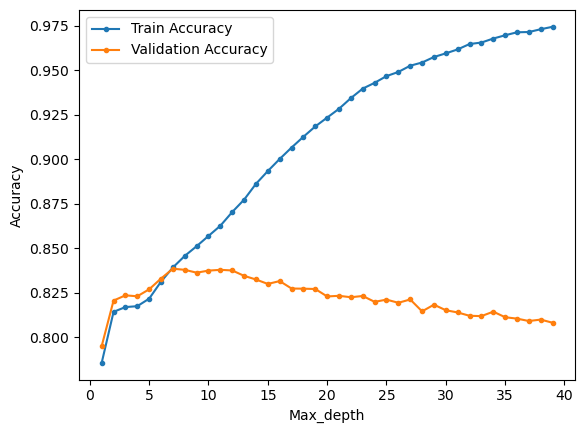

In [61]:
# Visualize the results
plt.figure()
plt.plot(max_depth,train_acc,label="Train Accuracy",marker='.')
plt.plot(max_depth, validation_acc,label="Validation Accuracy",marker='.')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

#### Optimizing for K in KNN (drop)

Missing: scale and PCA to reduce model complexity 

In [62]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN model 

# Range of k values to try
n_neighbors = range(5,100,10)

# List to storage important results
train_acc = []
validation_acc = []

for k in n_neighbors:
    
    # Define the KNN model 
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the KNN model on the new training subsets
    knn.fit(X_train_ss, y_train)
    
    # Predict 
    y_pred_train = knn.predict(X_train_ss)
    y_pred_val = knn.predict(X_val)
    
    # Evaluate the model on the test set
    acc_knn_train = accuracy_score(y_train, y_pred_train)
    acc_knn_val = accuracy_score(y_val, y_pred_val)
    
    # Print the results
    print(f"Neighbors number: {k} | Train Accuracy: {acc_knn_train} | Validation Accuracy: {acc_knn_val}")

    train_acc.append(acc_knn_train)
    validation_acc.append(acc_knn_val)


/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along

Neighbors number: 5 | Train Accuracy: 0.8189382084653257 | Validation Accuracy: 0.6375779162956366


/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along

Neighbors number: 15 | Train Accuracy: 0.7785580703026602 | Validation Accuracy: 0.6345503116651825


/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along

Neighbors number: 25 | Train Accuracy: 0.7689019503072402 | Validation Accuracy: 0.6367764915405165


/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along

Neighbors number: 35 | Train Accuracy: 0.7651234685699019 | Validation Accuracy: 0.7016918967052538


/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along

Neighbors number: 45 | Train Accuracy: 0.7601236594023129 | Validation Accuracy: 0.7325912733748887


/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along

Neighbors number: 55 | Train Accuracy: 0.7539406892866685 | Validation Accuracy: 0.717453250222618


/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along

Neighbors number: 65 | Train Accuracy: 0.7510018701576275 | Validation Accuracy: 0.7111308993766696


/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along

Neighbors number: 75 | Train Accuracy: 0.747185221938094 | Validation Accuracy: 0.7092609082813891


/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along

Neighbors number: 85 | Train Accuracy: 0.7446280676310064 | Validation Accuracy: 0.7067675868210151


/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Neighbors number: 95 | Train Accuracy: 0.7421472462883096 | Validation Accuracy: 0.7061442564559216


/Users/ccalderon/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


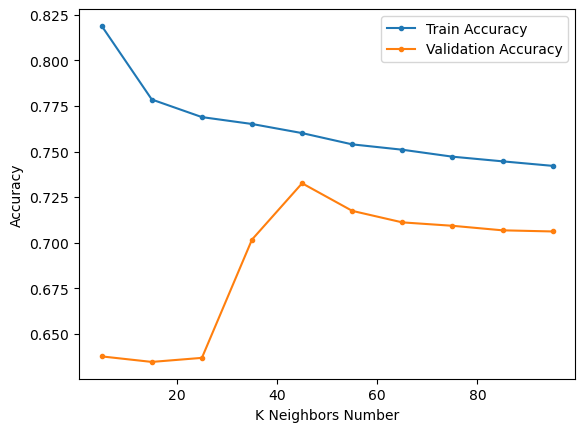

In [64]:
# Visualize the results
plt.figure()
plt.plot(n_neighbors,train_acc,label="Train Accuracy",marker='.')
plt.plot(n_neighbors, validation_acc,label="Validation Accuracy",marker='.')
plt.xlabel('K Neighbors Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

Too complex to run.

### Cross Validation

In [65]:
# Set up X (i.e., independent variables; features) and y (i.e., dependent variable; target)

X = df_processed.drop('disposition', axis=1)
y = df_processed['disposition']

# Print shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (53473, 601)
Shape of y: (53473,)


In [66]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Print info on how the data has been split
print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 37431 data points.
The test set has 16042 data points.


In [67]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_rem_ss = scaler.fit_transform(X_rem)
X_test_ss = scaler.transform(X_test)

#### C value

In [68]:
# Cross validation
from sklearn.model_selection import cross_val_score

# This is the same range of C values that I used before
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

# Set up an empty list
cv_accuracies = []

# Iterate over the C values
for value in c_values:
    
    # Instantiate a log reg
    logreg = LogisticRegression(C=value, random_state=1, n_jobs=-1,max_iter=10000)
    
    
    # Pass the model and the remainder set into the cross-validation function, then get cross-validated accuracy by taking the mean
    cv_accuracy = np.mean(cross_val_score(logreg, X_rem_ss, y_rem, cv=5, n_jobs=-1))
    
    # Append the cross-validated accuracy to the list set up above
    cv_accuracies.append(cv_accuracy)
    
    # Print something at the end of each iteration
    print(f'For a C value of {value}, the cross-validated accuracy is {round(cv_accuracy, 6)}')
    
    

For a C value of 1e-05, the cross-validated accuracy is 0.762229
For a C value of 0.0001, the cross-validated accuracy is 0.830996
For a C value of 0.001, the cross-validated accuracy is 0.846037
For a C value of 0.1, the cross-validated accuracy is 0.848735
For a C value of 1, the cross-validated accuracy is 0.848628
For a C value of 10, the cross-validated accuracy is 0.848601
For a C value of 100, the cross-validated accuracy is 0.848548
For a C value of 1000, the cross-validated accuracy is 0.848601
For a C value of 10000, the cross-validated accuracy is 0.848601


#### Max_depth

In [69]:
# Cross validation
from sklearn.model_selection import cross_val_score

# Depths
depths = range(5,15)

# Set up an empty list
cv_accuracies = []

# Iterate over the depth values
for depth in max_depth:
    
    # Define the KNN model 
    dtc = DecisionTreeClassifier(max_depth = depth)
    
    # Pass the model and the remainder set into the cross-validation function, then get cross-validated accuracy by taking the mean
    cv_accuracy = np.mean(cross_val_score(dtc, X_rem_ss, y_rem, cv=5, n_jobs=-1))
    
    # Append the cross-validated accuracy to the list set up above
    cv_accuracies.append(cv_accuracy)
    
    # Print something at the end of each iteration
    print(f'For a max_depth value of {depth}, the cross-validated accuracy is {round(cv_accuracy, 6)}')
    
    

For a max_depth value of 1, the cross-validated accuracy is 0.788437
For a max_depth value of 2, the cross-validated accuracy is 0.816142
For a max_depth value of 3, the cross-validated accuracy is 0.81876
For a max_depth value of 4, the cross-validated accuracy is 0.81868
For a max_depth value of 5, the cross-validated accuracy is 0.825278
For a max_depth value of 6, the cross-validated accuracy is 0.829874
For a max_depth value of 7, the cross-validated accuracy is 0.832919
For a max_depth value of 8, the cross-validated accuracy is 0.834362
For a max_depth value of 9, the cross-validated accuracy is 0.834415
For a max_depth value of 10, the cross-validated accuracy is 0.831957
For a max_depth value of 11, the cross-validated accuracy is 0.831744
For a max_depth value of 12, the cross-validated accuracy is 0.831824
For a max_depth value of 13, the cross-validated accuracy is 0.831477
For a max_depth value of 14, the cross-validated accuracy is 0.830622
For a max_depth value of 15, th

#### Random Forest and cross validation

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Depths
n_estimators = range(5,100,5)

# Set up an empty list
cv_accuracies = []

# Iterate over the depth values
for n in n_estimators:
    
    # Define the Random Forest model 
    rf_clf = RandomForestClassifier(n_estimators=n)
    
    # Pass the model and the remainder set into the cross-validation function, then get cross-validated accuracy by taking the mean
    cv_accuracy = np.mean(cross_val_score(rf_clf, X_rem_ss, y_rem, cv=5, n_jobs=-1))
    
    # Append the cross-validated accuracy to the list set up above
    cv_accuracies.append(cv_accuracy)
    
    # Print something at the end of each iteration
    print(f'For n_estimators value of {n}, the cross-validated accuracy is {round(cv_accuracy, 6)}')
    

For n_estimators value of 5, the cross-validated accuracy is 0.826855
For n_estimators value of 10, the cross-validated accuracy is 0.836793
For n_estimators value of 15, the cross-validated accuracy is 0.842216
For n_estimators value of 20, the cross-validated accuracy is 0.844461
For n_estimators value of 25, the cross-validated accuracy is 0.848842
For n_estimators value of 30, the cross-validated accuracy is 0.848495
For n_estimators value of 35, the cross-validated accuracy is 0.848334
For n_estimators value of 40, the cross-validated accuracy is 0.849483
For n_estimators value of 45, the cross-validated accuracy is 0.84983
For n_estimators value of 50, the cross-validated accuracy is 0.850231
For n_estimators value of 55, the cross-validated accuracy is 0.85122
For n_estimators value of 60, the cross-validated accuracy is 0.849804
For n_estimators value of 65, the cross-validated accuracy is 0.85154
For n_estimators value of 70, the cross-validated accuracy is 0.850605
For n_esti

#### AdaBoost Classifier

In [71]:
from sklearn.ensemble import AdaBoostClassifier

# Depths
n_estimators_ada = range(5,100,5)

# Set up an empty list
cv_accuracies_ada = []

# Iterate over the depth values
for n_ada in n_estimators_ada:
    
    # Define the Adaboost model
    ada_clf = AdaBoostClassifier(n_estimators=n_ada)
    
    # Pass the model and the remainder set into the cross-validation function, then get cross-validated accuracy by taking the mean
    cv_accuracy_ada = np.mean(cross_val_score(ada_clf, X_rem_ss, y_rem, cv=5, n_jobs=-1))
    
    # Append the cross-validated accuracy to the list set up above
    cv_accuracies_ada.append(cv_accuracy_ada)
    
    # Print something at the end of each iteration
    print(f'For n_estimators_ada value of {n_ada}, the cross-validated accuracy is {round(cv_accuracy_ada, 6)}')
    

For n_estimators_ada value of 5, the cross-validated accuracy is 0.816195
For n_estimators_ada value of 10, the cross-validated accuracy is 0.828778
For n_estimators_ada value of 15, the cross-validated accuracy is 0.834415
For n_estimators_ada value of 20, the cross-validated accuracy is 0.836419
For n_estimators_ada value of 25, the cross-validated accuracy is 0.839732
For n_estimators_ada value of 30, the cross-validated accuracy is 0.840961
For n_estimators_ada value of 35, the cross-validated accuracy is 0.843151
For n_estimators_ada value of 40, the cross-validated accuracy is 0.844701
For n_estimators_ada value of 45, the cross-validated accuracy is 0.845823
For n_estimators_ada value of 50, the cross-validated accuracy is 0.845903
For n_estimators_ada value of 55, the cross-validated accuracy is 0.84593
For n_estimators_ada value of 60, the cross-validated accuracy is 0.846571
For n_estimators_ada value of 65, the cross-validated accuracy is 0.846598
For n_estimators_ada value 

## Pipeline

1. Downsampling

2. Variance Threshold 

3. Modeling with and without PCA

- Logistic Regresion with best C value
- Decision Tree with best Max_depth
- Random Forest with best estimator
- Adaboost Cl with best estimators

4. Choose the best, deploy and EVALUATE (scores, AUC)

In [72]:
from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp


# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline
# The steps here act as placeholders and will be changed when we pass the pipeline into the grid search later
my_pipeline = Pipeline([('scaler', StandardScaler()), ('dim_reducer', PCA()), ('model', LogisticRegression())], memory=cachedir)


In [ ]:
# Parameter grid
logreg_param_grid = [
    
    # l1 without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(random_state=1, n_jobs=-1,max_iter=100000)],
     'model__C': c_values},
]

RF AB --  Max_depth in RForest, (NO ABoots), n estimators (more acc but more overfitting), 

END